# Example plots

In this notebook, we show some examples of how to use the functions defined in `dd_limit_plot.py` to facilitate the creation of limit plots.

Results--whether they are sensitivities, upper limits, etc.-- are stored in `../data/` as `.csv` files. 
In addition, you can optionally add properties (labels, plot colors, bibliography information) for a given .csv file named `FILENAME.csv` under the entry for "FILENAME" in `../data/result_metadata.toml`.

The script will look in `../data/` by default, and you can provide the file name (even including wildcards) to the DD_result class. Note that if there are several matches, you'll get an error + a list of available matches.

Alright, let's dive in!

In [1]:
# Install any packages you may be missing (only needed once)
!pip install tomlkit
!pip install importlib_resources
!pip install matplotlib-label-lines

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-13-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-13-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-13-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package in

In [2]:
# Import packages
import sys
sys.path.append('../')
from dd_limit_plot import DD_result, find_dd_results
import matplotlib.pyplot as plt

## Basic example
Let us plot the XENONnT and LZ spin-independent limits, as well as just an example .csv file called example_file.csv:  

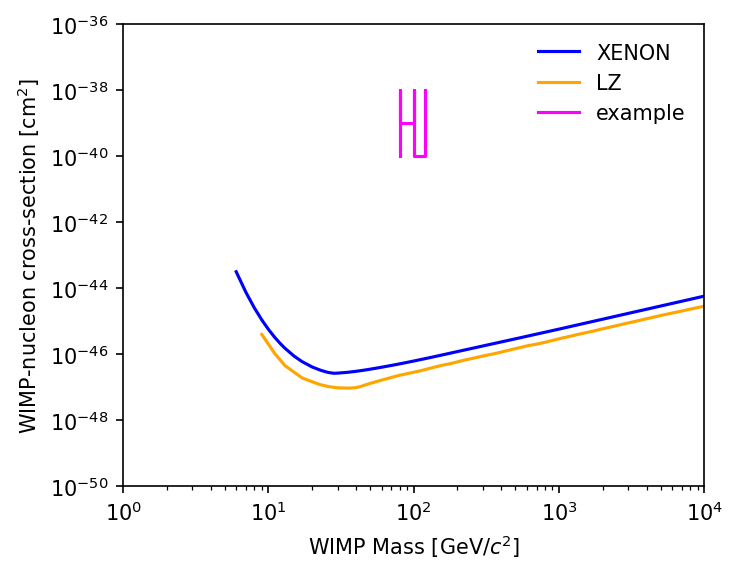

In [3]:
xenon_limit = DD_result("WIMPSI_XENONnT_2023_2303.14729.csv")
lz_limit    = DD_result("WIMPSI_LZ_2023_2207.03764.csv")
example_line = DD_result("example_*.csv")


fig = plt.subplots(figsize=(5,4), dpi=150)
xenon_limit.plot_upper_limit(color="blue", label="XENON")
lz_limit.plot_upper_limit(color="orange", label="LZ")
example_line.plot_upper_limit(color="magenta", label="example")

plt.yscale("log")
plt.xscale("log")
plt.xlim([1, 1e4])
plt.ylim([1e-50, 1e-36])
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
plt.legend(loc='upper right', fontsize='medium', frameon=False)
plt.show()


### Tip 1
The XENON and LZ lines have bibliographical information included in their metadata, so you can print this out: 

In [4]:
print(xenon_limit.reference)
print(lz_limit.reference)

@article{XENON:2023cxc,
    author = "Aprile, E. and others",
    collaboration = "XENON",
    title = "{First Dark Matter Search with Nuclear Recoils from the XENONnT Experiment}",
    eprint = "2303.14729",
    archivePrefix = "arXiv",
    primaryClass = "hep-ex",
    doi = "10.1103/PhysRevLett.131.041003",
    journal = "Phys. Rev. Lett.",
    volume = "131",
    number = "4",
    pages = "041003",
    year = "2023"
    } 

@article{LZ:2022lsv,
    author = "Aalbers, J. and others",
    collaboration = "LZ",
    title = "{First Dark Matter Search Results from the LUX-ZEPLIN (LZ) Experiment}",
    eprint = "2207.03764",
    archivePrefix = "arXiv",
    primaryClass = "hep-ex",
    doi = "10.1103/PhysRevLett.131.041002",
    journal = "Phys. Rev. Lett.",
    volume = "131",
    number = "4",
    pages = "041002",
    year = "2023"
}



### Tip 2

The XENON and LZ results don't just come with the default wimp_mass and upper_limits fields. They also include the experiment sensitivity, which you can plot alongside the upper limits:

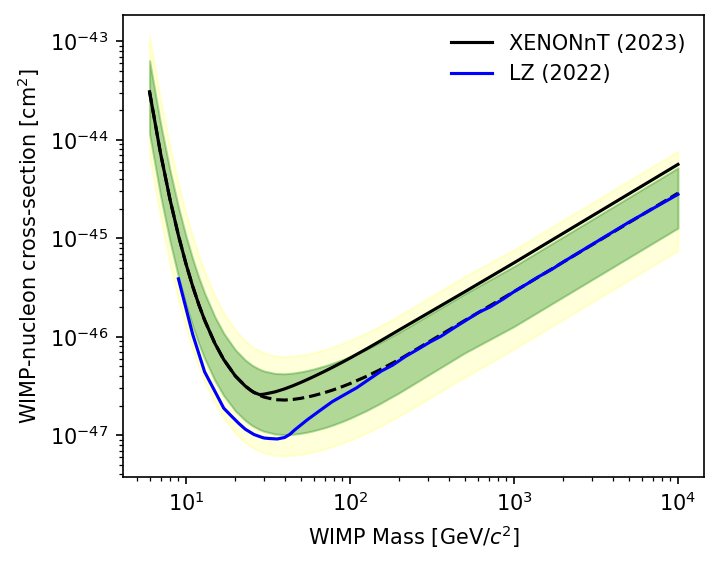

In [5]:
show_lz = True

fig = plt.subplots(figsize=(5,4), dpi=150)
xenon_limit.plot_band("sensitivity_m2sigma","sensitivity_p2sigma", alpha=0.15, color="yellow") #between -2 sigma and +2sigma
xenon_limit.plot_band("sensitivity_m1sigma","sensitivity_p1sigma", alpha=0.3, color="green") #between -1 sigma and +1sigma
xenon_limit.plot_sensitivity(color="k")
xenon_limit.plot_upper_limit(color="k", label="XENONnT (2023)")

if show_lz:
    lz_limit.plot_upper_limit(color="blue", label="LZ (2022)")


plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
plt.legend(loc='upper right', fontsize='medium', frameon=False)
plt.show()

## Finding multiple results


By using `find_dd_results`, you can get an array of dd_results matching a string. For this reason, we recommend to name new files following the pattern you see in data: `targetsignal_experiment_year_arxivnumber.csv` or similar 
   
For instance, let's plot all xenon SI wimp results:


In [6]:
xenon_limit.plot_upper_limit

<bound method DD_result.plot_upper_limit of <dd_limit_plot.DD_result object at 0x10f9c2eb0>>

['/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON1T_2019_S2only.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON1T_2021_2fold.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENONnT_2023_2303.14729.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON10_2008_0706.0039.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON1T_2018_1805.12562.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON1T_2019_S2onlyMigdal.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENONnT_2020_projection20ty.csv']
7 files match your query:
Loaded 7 files:
2024 4.2 tonne-year Spin-independent result from LZ (power-constrained at -1sigma)
XENON1T tonne-year SI WIMP limit
Limits using S2-only signals
Limits using S2-only signals and assuming the Migdal effect
Limits using 2-fold S1+S2 signals
Projected XENOnT full exposure, two-sided
2023 tonne-year Spin-independent result from XENONnT (power-constrained

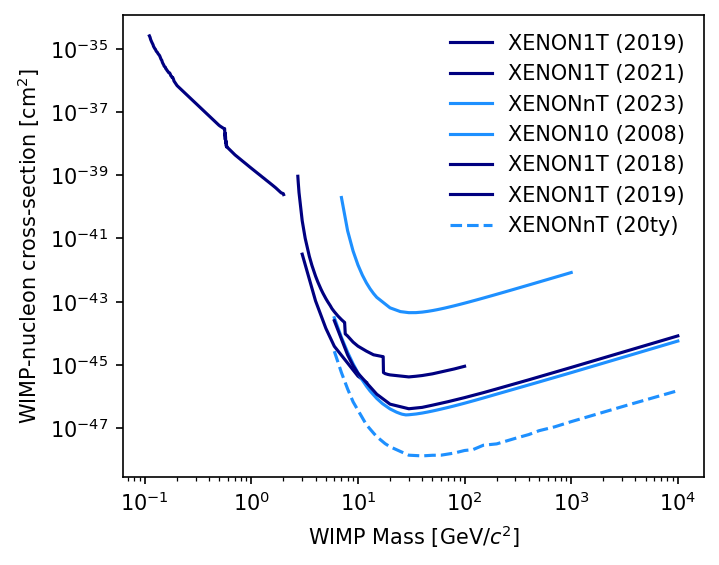

In [7]:
xenon_results = find_dd_results("WIMPSI_XENON*")

fig = plt.subplots(figsize=(5,4), dpi=150)
for k,result in xenon_results.items(): 
    try: #some of the files are projections that do not have upper limits
        result.plot_upper_limit(label=result.label)
    except: 
        result.plot_sensitivity(label=result.label)


plt.yscale("log")
plt.xscale("log")
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
plt.legend(loc='upper right', fontsize='medium', frameon=False)
plt.show()



## Plotting many results with nice labels
if you have https://github.com/cphyc/matplotlib-label-lines installed, you can have all plot labels neatly placed alongside your lines, with the option to manually choose the x-position in order to show them all: 

In [8]:
all_wimp_limits = find_dd_results("WIMPSI*")
nufloor = DD_result("nufloor*")

['/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_LUX_2017_run4combined.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_CRESSTIII_2019.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_DarkSide50_2018_lowE_noquench.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_LZ_2023_2207.03764.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_LZ_2024_privatecommunication.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON1T_2019_S2only.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON1T_2021_2fold.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_LZ_2019_projection.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENONnT_2023_2303.14729.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_PandaX-4T_2021_2107.13438.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_XENON10_2008_0706.0039.csv', '/Users/kdund/Desktop/plotting/dd_limit_plot/data/WIMPSI_CDM

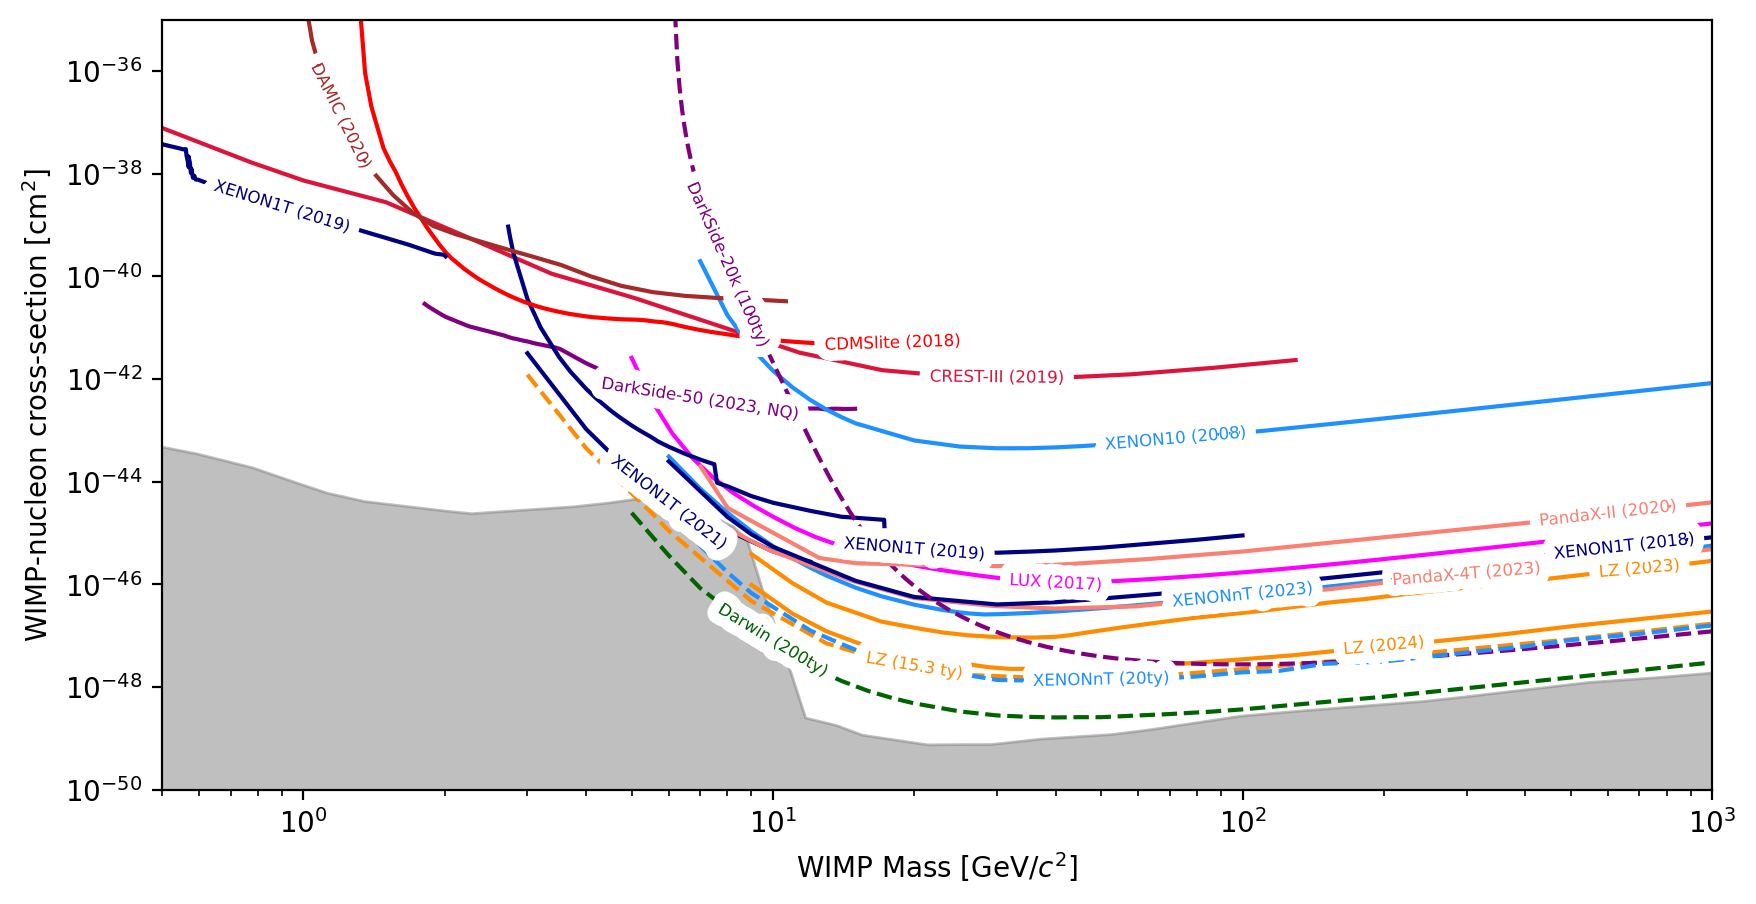

In [9]:
fig = plt.subplots(figsize=(10,5), dpi=200)

for k,i in all_wimp_limits.items():
    try:
        i.plot_upper_limit(label=i.label)
    except:
        i.plot_sensitivity(label=i.label)
plt.xlim([1e-1, 1e3])
plt.ylim([5e-48, 1e-35])

plt.yscale("log") #if you do not set hte 
plt.xscale("log")
plt.xlim([1e-1, 1e3])
plt.ylim([5e-48, 1e-35])
nufloor.plot_band(0., "nufloor", color="gray", alpha=0.5)
try:
    DD_result.add_line_legends(
        position_overrides = { #if the line labels overlap, you can set positions here: 
            #"WIMPSI_XENON1T_2019_S2onlyupper_limit":3,
            #"WIMPSI_XENON1T_2019_S2onlyMigdalupper_limit":0.2
            
             'WIMPSI_CRESSTIII_2019upper_limit':30,
             'WIMPSI_DAMIC_2020upper_limit':1.2,
             'WIMPSI_DarkSide50_2018_lowE_noquenchupper_limit':7,
             'WIMPSI_Darwin_2016_projection_200tysensitivity_median':10,
             'WIMPSI_LUX_2017_run4combinedupper_limit':40,
             'WIMPSI_LZ_2019_projectionsensitivity_median':20,
             'WIMPSI_LZ_2023_2207.03764upper_limit':700,
             'WIMPSI_PANDAXII_2020_2007.15469upper_limit':600,
             'WIMPSI_PandaX-4T_2021_2107.13438upper_limit':300,
             'WIMPSI_XENON1T_2018_1805.12562upper_limit':650,
             'WIMPSI_XENON1T_2019_S2onlyMigdalupper_limit':0.9,
             'WIMPSI_XENON1T_2019_S2onlyupper_limit':20,
             'WIMPSI_XENON1T_2021_2foldupper_limit':6,
             'WIMPSI_XENONnT_2020_projection20tysensitivity_median':50,
             'WIMPSI_XENONnT_2023_2303.14729upper_limit':100,
             'WIMPSI_darkside20k_2017_100tysensitivity_median':8,
             'WIMPSI_LZ_2024_privatecommunicationupper_limit': 200,
        },
        size=6,
        xmax=1000,
        #alpha = 0.5,
    )
except: 
    #perhaps you do not have the matplotlib-label-line package?
    plt.legend(loc='upper right', fontsize='small', frameon=False)
plt.xlabel("WIMP Mass [GeV$/c^2$]")
plt.ylabel("WIMP-nucleon cross-section [cm$^2$]")
plt.xlim([0.5, 1e3])
plt.ylim([1e-50, 1e-35])
#plt.legend(loc='upper right', fontsize='small', frameon=False)
plt.savefig("allwimp_limits.pdf")
plt.show()